<a href="https://colab.research.google.com/github/UdaySMukherjee/Machine-Learning-Tasks/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Assignment:
1. Make use of the data set provided to build a Decision Tree based classifier.
2. Show the first 10 and last 5 rows of the data set.
3. Do all other data pre-processing whatever you deem to be necessary and important. Justify your answer.
4. Split the data set in Train and Test.
5. Build the model using Decision Tree classifier.
6. Display the confusion matrix and comment on the same.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("DataSet for Decision Tree.csv")
df.shape

(32560, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.drop(["capital.gain", "capital.loss"], axis = 1, inplace = True)

z = df.loc[df['workclass']=='x']
indexes = z.index

df.drop(indexes, axis = 0, inplace = True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
df_categorical = df[cat_col]

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cat_col:
    df_categorical[col] = labelencoder.fit_transform(df_categorical[col])

df_categorical.head()

<ipython-input-26-35f0b6a02589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col] = labelencoder.fit_transform(df_categorical[col])
<ipython-input-26-35f0b6a02589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col] = labelencoder.fit_transform(df_categorical[col])
<ipython-input-26-35f0b6a02589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,3,11,6,4,1,4,0,39,0
3,3,5,0,7,4,4,0,39,0
4,3,15,5,10,3,4,0,39,0
5,3,11,0,8,4,4,0,39,0
6,3,0,5,1,4,4,1,39,0


In [ ]:
df.drop(cat_col,axis=1,inplace=True)

df = pd.concat([df,df_categorical],axis=1)

df.tail()

,age,fnlwgt,education.num,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
32555,22,310152,10,40,3,15,4,11,1,4,1,39,0
32556,27,257302,12,38,3,7,2,13,5,4,0,39,0
32557,40,154374,9,40,3,11,2,7,0,4,1,39,1
32558,58,151910,9,40,3,11,6,1,4,4,0,39,0
32559,22,201490,9,20,3,11,4,1,3,4,1,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30724 entries, 1 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30724 non-null  int64
 1   fnlwgt          30724 non-null  int64
 2   education.num   30724 non-null  int64
 3   hours.per.week  30724 non-null  int64
 4   workclass       30724 non-null  int64
 5   education       30724 non-null  int64
 6   marital.status  30724 non-null  int64
 7   occupation      30724 non-null  int64
 8   relationship    30724 non-null  int64
 9   race            30724 non-null  int64
 10  sex             30724 non-null  int64
 11  native.country  30724 non-null  int64
 12  income          30724 non-null  int64
dtypes: int64(13)
memory usage: 3.3 MB


In [ ]:
df['income'] = df['income'].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]

y = df.iloc[:, -1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

X_train.shape,X_test.shape,y_train.shape,y_test.shape



((21506, 12), (9218, 12), (21506,), (9218,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_default = DecisionTreeClassifier(max_depth=5)

model_DT = DT_default.fit(X_train,y_train)
model_DT

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_test_default = model_DT.predict(X_test)
print(classification_report(y_test,y_pred_test_default))

print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')

print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')



              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6929
           1       0.73      0.44      0.55      2289

    accuracy                           0.82      9218
   macro avg       0.78      0.69      0.72      9218
weighted avg       0.81      0.82      0.80      9218

 Confusion_Matrix: 
 [[6546  383]
 [1272 1017]] 

 Accuracy_Score:
 0.8204599696246474


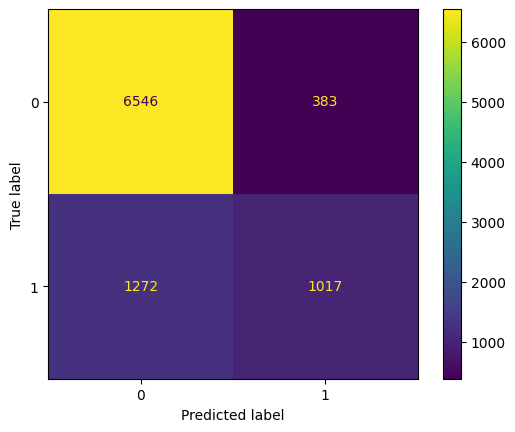

In [ ]:
cm = confusion_matrix(y_test,y_pred_test_default)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()